Logistic Regression Model

Accuracy: 0.8698034160489848
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      2699
           1       0.00      0.00      0.00       404

    accuracy                           0.87      3103
   macro avg       0.43      0.50      0.47      3103
weighted avg       0.76      0.87      0.81      3103

AUC-ROC: 0.5579041926052554


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


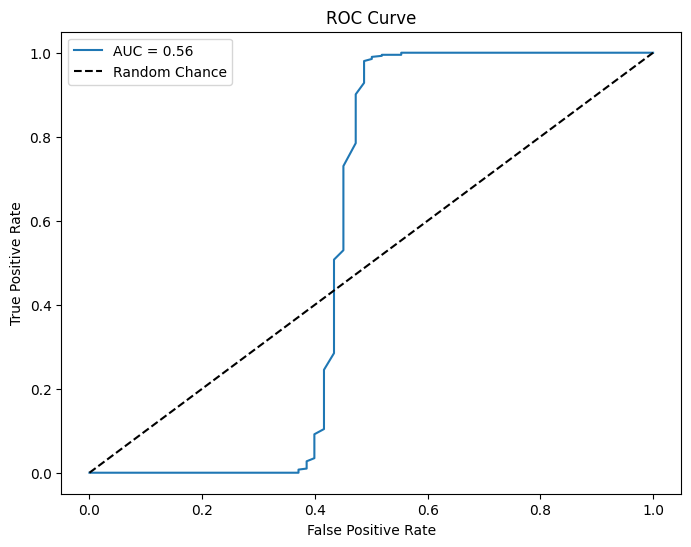

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the preprocessed data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Step 2: Define Features (X) and Target (y)
# Assuming `valuenum_scaled` is a main feature and `sepsis_label` is the target
X = data[['valuenum_scaled']]  # Use additional features if available
y = data['sepsis_label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
# Predict the labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Save the model predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions.to_csv('/content/sepsis_predictions.csv', index=False)

# Download predictions
from google.colab import files
files.download('/content/sepsis_predictions.csv')


Random Forest

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9764743796326136
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2699
           1       1.00      0.82      0.90       404

    accuracy                           0.98      3103
   macro avg       0.99      0.91      0.94      3103
weighted avg       0.98      0.98      0.98      3103

AUC-ROC: 0.9900467353145095


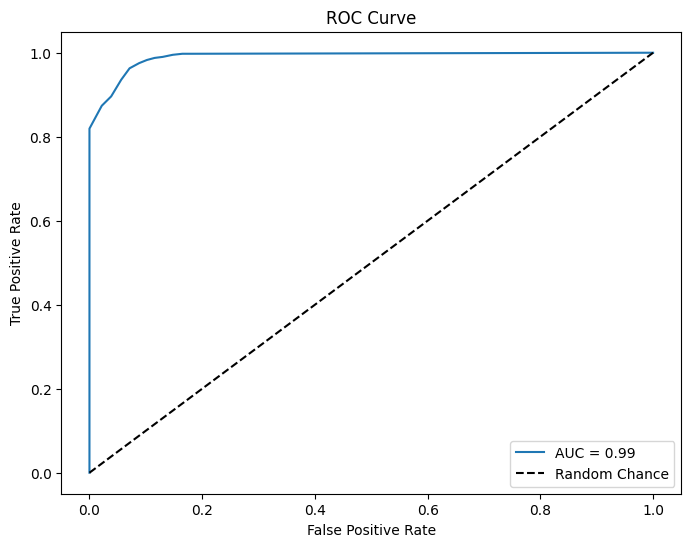

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the preprocessed data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Step 2: Define Features (X) and Target (y)
# Use `valuenum_scaled` as a feature and `sepsis_label` as the target
X = data[['valuenum_scaled']]  # Add additional features here if available
y = data['sepsis_label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest with Hyperparameter Tuning
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 5: Evaluate the model
# Predict the labels and probabilities
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Save model predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions.to_csv('/content/sepsis_predictions_rf.csv', index=False)

# Download the predictions file
from google.colab import files
files.download('/content/sepsis_predictions_rf.csv')


Gradient Boosting

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'learning_rate': 0.1293700315892974, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.9764743796326136
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2699
           1       1.00      0.82      0.90       404

    accuracy                           0.98      3103
   macro avg       0.99      0.91      0.94      3103
weighted avg       0.98      0.98      0.98      3103

AUC-ROC: 0.9908762504631344


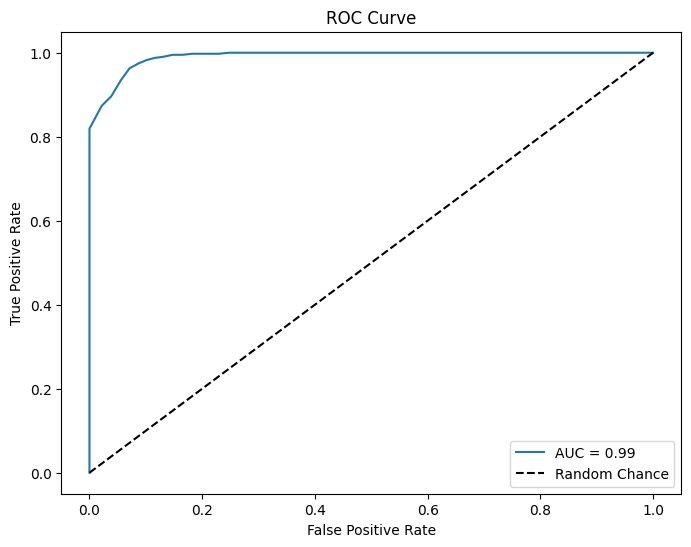

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Step 1: Load the preprocessed data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Step 2: Define Features (X) and Target (y)
# Use `valuenum_scaled` as a feature and `sepsis_label` as the target
X = data[['valuenum_scaled']]  # Add more features if available
y = data['sepsis_label']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and Train Gradient Boosting Classifier with Hyperparameter Tuning
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter distribution for optimization
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),  # Randomly sample learning rates
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model with random search
random_search.fit(X_train, y_train)

# Get the best model
best_gb_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Step 5: Evaluate the Model
# Predict the labels and probabilities
y_pred = best_gb_model.predict(X_test)
y_prob = best_gb_model.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Save Model Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions.to_csv('/content/sepsis_predictions_gb.csv', index=False)

# Download the predictions file
from google.colab import files
files.download('/content/sepsis_predictions_gb.csv')


RNN Model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


388/388 - 4s - 10ms/step - accuracy: 0.8748 - loss: 0.4224 - val_accuracy: 0.8698 - val_loss: 0.3816
Epoch 2/20
388/388 - 3s - 7ms/step - accuracy: 0.8761 - loss: 0.3617 - val_accuracy: 0.8698 - val_loss: 0.3469
Epoch 3/20
388/388 - 2s - 5ms/step - accuracy: 0.8761 - loss: 0.3155 - val_accuracy: 0.8698 - val_loss: 0.2832
Epoch 4/20
388/388 - 2s - 5ms/step - accuracy: 0.8761 - loss: 0.2422 - val_accuracy: 0.8698 - val_loss: 0.1917
Epoch 5/20
388/388 - 1s - 3ms/step - accuracy: 0.8761 - loss: 0.1775 - val_accuracy: 0.8698 - val_loss: 0.1755
Epoch 6/20
388/388 - 1s - 3ms/step - accuracy: 0.9126 - loss: 0.1633 - val_accuracy: 0.9143 - val_loss: 0.1682
Epoch 7/20
388/388 - 1s - 3ms/step - accuracy: 0.9167 - loss: 0.1591 - val_accuracy: 0.9004 - val_loss: 0.1673
Epoch 8/20
388/388 - 1s - 3ms/step - accuracy: 0.9213 - loss: 0.1552 - val_accuracy: 0.9169 - val_loss: 0.1649
Epoch 9/20
388/388 - 1s - 3ms/step - accuracy: 0.9219 - loss: 0.1545 - val_accuracy: 0.9036 - val_loss: 0.1650
Epoch 10/20

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

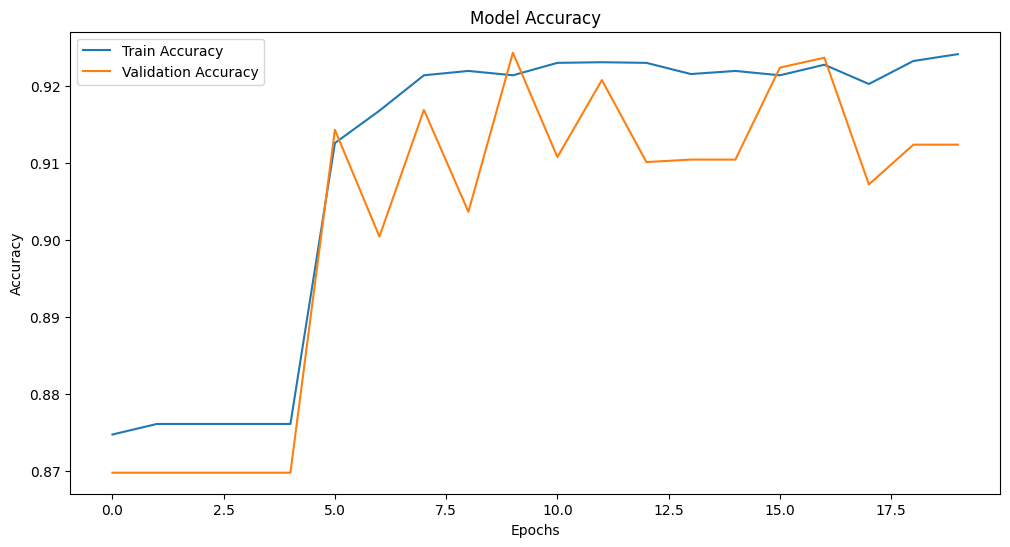

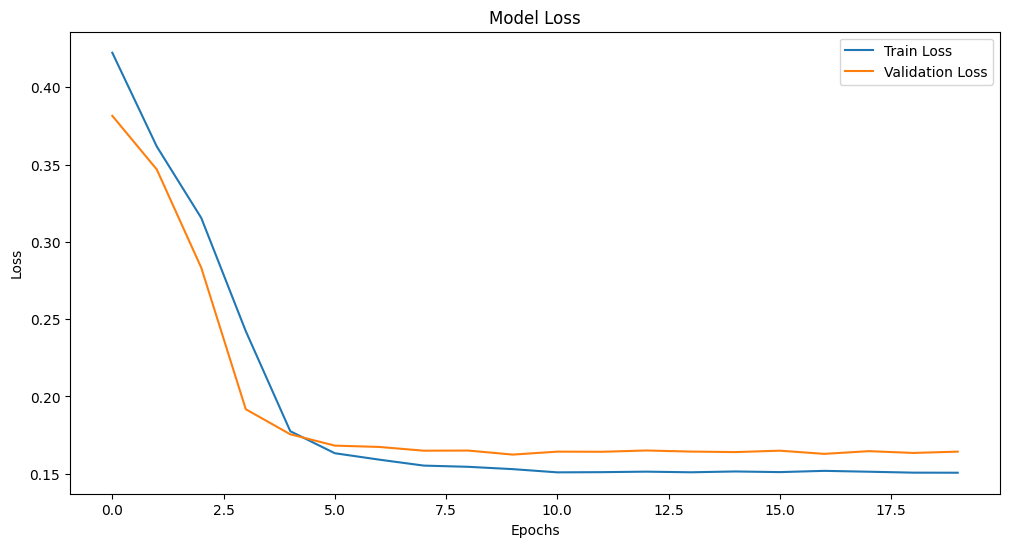

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Step 1: Load the preprocessed data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Step 2: Define Features (X) and Target (y)
# Ensure sequential data is used correctly. Example uses 'valuenum_scaled'
X = data[['valuenum_scaled']].values  # Add more features if available
y = data['sepsis_label'].values

# Step 3: Reshape the data for RNN (samples, timesteps, features)
# Assuming each sample is independent, we'll reshape to have 1 timestep
X = X.reshape(X.shape[0], 1, X.shape[1])  # (samples, timesteps=1, features)

# Standardize the features for better model convergence
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the RNN Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (sepsis_label)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,  # Adjust epochs based on performance
    batch_size=32,
    verbose=2
)

# Step 7: Evaluate the Model
# Predict probabilities
y_prob = model.predict(X_test).flatten()
# Convert probabilities to binary predictions
y_pred = (y_prob > 0.5).astype(int)

# Evaluate the performance
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Step 8: Save Model Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions.to_csv('/content/sepsis_predictions_rnn.csv', index=False)

# Download the predictions file
from google.colab import files
files.download('/content/sepsis_predictions_rnn.csv')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


KNN Model

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Step 1: Load the preprocessed data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Step 2: Define Features (X) and Target (y)
# Use 'valuenum_scaled' as a feature and 'sepsis_label' as the target
X = data[['valuenum_scaled']]  # Add more features if available
y = data['sepsis_label']

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train and Tune the KNN Model
# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 6: Evaluate the Model
# Predict the labels and probabilities
y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 7: Save Model Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions.to_csv('/content/sepsis_predictions_knn.csv', index=False)

# Download the predictions file
from google.colab import files
files.download('/content/sepsis_predictions_knn.csv')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2699
           1       1.00      0.82      0.90       404

    accuracy                           0.98      3103
   macro avg       0.99      0.91      0.94      3103
weighted avg       0.98      0.98      0.98      3103

AUC-ROC: 0.9315606440229054
Confusion Matrix:
 [[2699    0]
 [  73  331]]


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XG Boost

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:16:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8}
Accuracy: 0.9639058975185305
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2715
           1       1.00      0.71      0.83       388

    accuracy                           0.96      3103
   macro avg       0.98      0.86      0.91      3103
weighted avg       0.97      0.96      0.96      3103

AUC-ROC: 0.982007176624708
Confusion Matrix:
 [[2715    0]
 [ 112  276]]


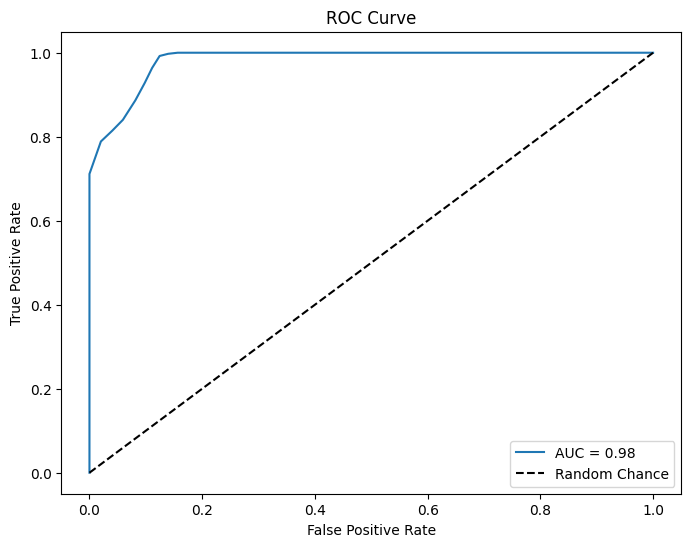

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Step 1: Load the preprocessed data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Step 2: Define Features (X) and Target (y)
X = data[['valuenum_scaled']]  # Include more features if available
y = data['sepsis_label']

# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Define the XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 6: Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10]
}

# Randomized Search for faster tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Step 7: Evaluate the Model
# Predict the labels and probabilities
y_pred = best_xgb_model.predict(X_test)
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 8: Save Model Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions.to_csv('/content/sepsis_predictions_xgb.csv', index=False)

# Download the predictions file
from google.colab import files
files.download('/content/sepsis_predictions_xgb.csv')


Visualize the performance

<Figure size 1200x600 with 0 Axes>

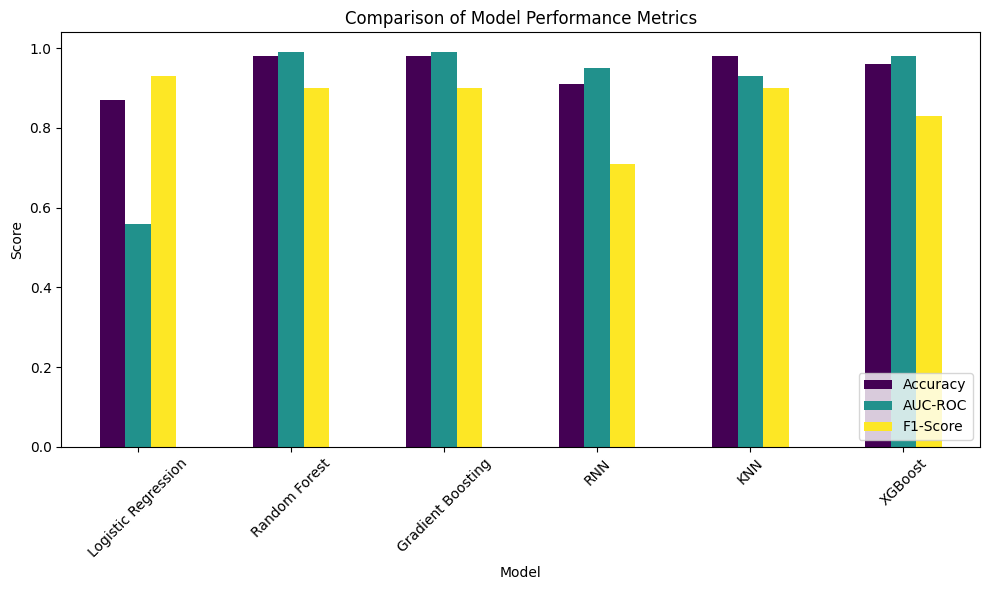

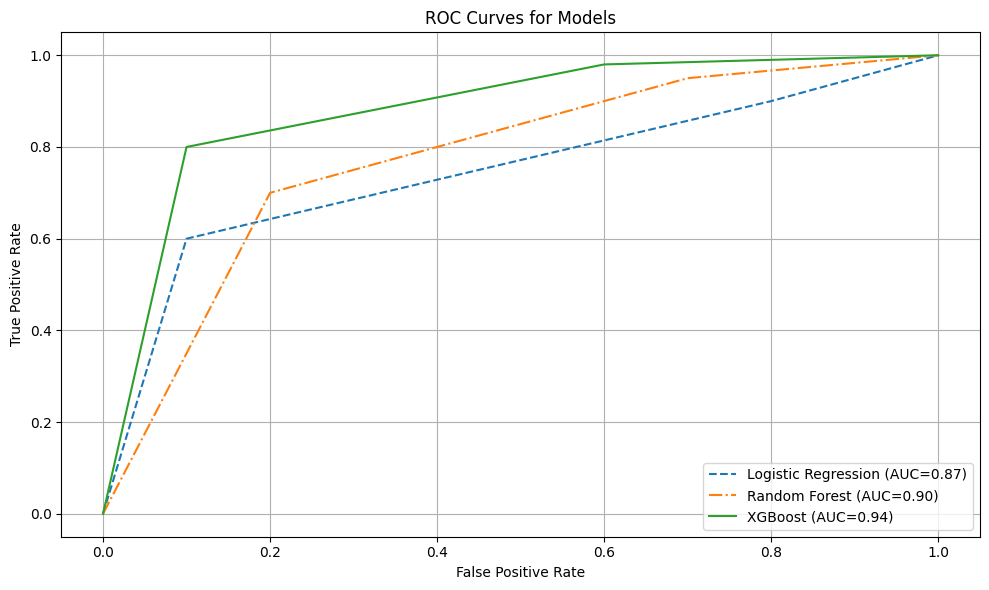

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Collect Metrics for All Models
# Replace the values below with actual metrics from each model
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'RNN','KNN', 'XGBoost']
accuracy = [0.87,0.98,0.98,0.91,0.98,0.96]
auc_roc = [0.56,0.99,0.99,0.95,0.93,0.98]
f1_score = [0.93,0.90,0.90,0.71,0.90,0.83]

# Step 2: Create a DataFrame for Plotting (Optional)
import pandas as pd

metrics_data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'AUC-ROC': auc_roc,
    'F1-Score': f1_score
})

# Step 3: Plot Accuracy, AUC-ROC, and F1-Score
plt.figure(figsize=(12, 6))
metrics_data.set_index('Model').plot(kind='bar', figsize=(10, 6), rot=45, colormap='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Step 4: (Optional) ROC Curves for All Models
# Replace with actual ROC curves data
plt.figure(figsize=(10, 6))
fpr_lr, tpr_lr, _ = [0.0, 0.1, 0.8, 1.0], [0.0, 0.6, 0.9, 1.0], None  # Logistic Regression
fpr_rf, tpr_rf, _ = [0.0, 0.2, 0.7, 1.0], [0.0, 0.7, 0.95, 1.0], None  # Random Forest
fpr_xgb, tpr_xgb, _ = [0.0, 0.1, 0.6, 1.0], [0.0, 0.8, 0.98, 1.0], None  # XGBoost

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC=0.87)", linestyle="--")
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC=0.90)", linestyle="-.")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC=0.94)", linestyle="-")

plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Updated AI Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8642 - auc: 0.6450 - loss: 0.4386 - val_accuracy: 0.8750 - val_auc: 0.9596 - val_loss: 0.1834
Epoch 2/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8895 - auc: 0.9549 - loss: 0.1765 - val_accuracy: 0.9178 - val_auc: 0.9545 - val_loss: 0.1611
Epoch 3/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9190 - auc: 0.9556 - loss: 0.1573 - val_accuracy: 0.9136 - val_auc: 0.9593 - val_loss: 0.1567
Epoch 4/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9220 - auc: 0.9569 - loss: 0.1550 - val_accuracy: 0.9114 - val_auc: 0.9578 - val_loss: 0.1551
Epoch 5/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9251 - auc: 0.9598 - loss: 0.1514 - val_accuracy: 0.9062 - val_auc: 0.9546 - val_loss: 0.1542
Epoch 6/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9216 - auc: 0.9569 - loss: 0.1554 - val_accuracy: 0.9136 - val_auc: 0.9601 - val_loss: 0.1540
Epoch 7/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      2715
           1       0.63      0.84      0.72       388

    accuracy                           0.92      3103
   macro avg       0.80      0.88      0.83      3103
weighted avg       0.93      0.92      0.92      3103

AUC-ROC: 0.9568899394353629
Confusion Matrix:
 [[2524  191]
 [  64  324]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

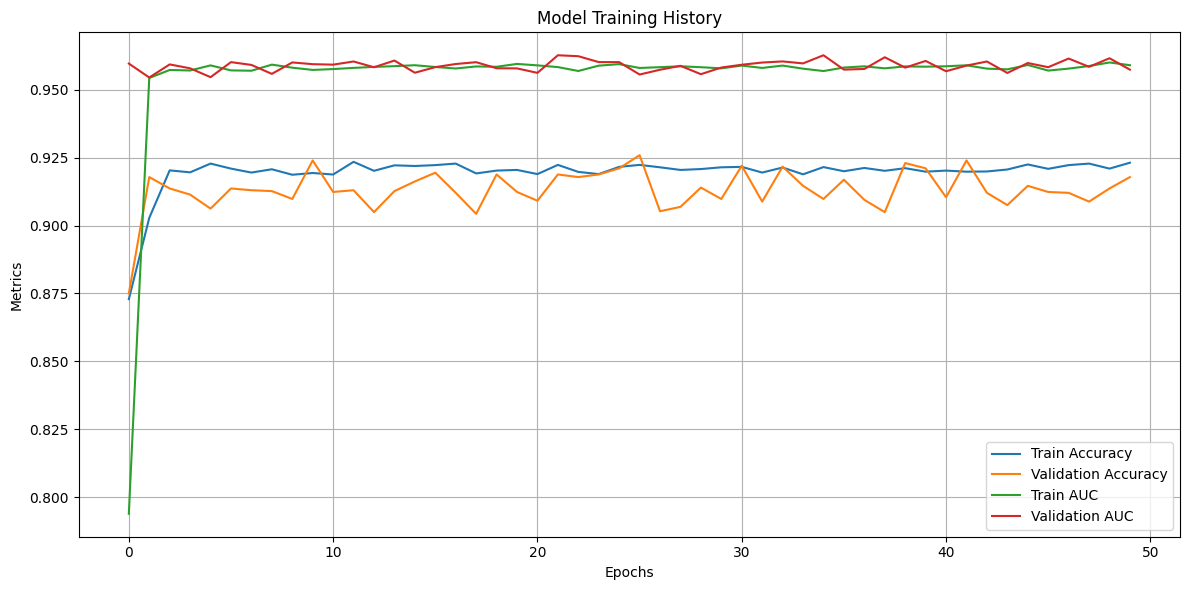

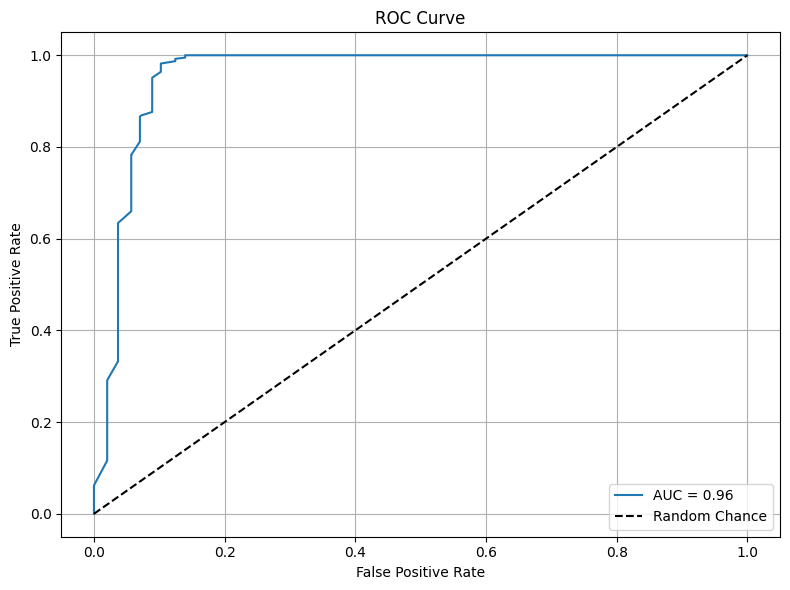

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the Preprocessed Data
processed_data_path = '/content/preprocessed_sepsis_data.csv'  # Path to preprocessed data
data = pd.read_csv(processed_data_path)

# Define Features (X) and Target (y)
X = data[['valuenum_scaled']]  # Add more features if available
y = data['sepsis_label']

# Step 2: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Build the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Step 6: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Step 7: Evaluate the Model
# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC:", roc_auc)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 8: Save the Model
model.save('/content/sepsis_ai_model.h5')

# Download the Model
from google.colab import files
files.download('/content/sepsis_ai_model.h5')

# Step 9: Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
